In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

%matplotlib inline

In [2]:
data = pd.read_csv('data_train.csv')
data.head()

,Category,Message
0,ham,TODAY is Sorry day.! If ever i was angry with ...
1,ham,I.ll give her once i have it. Plus she said gr...
2,ham,Where is it. Is there any opening for mca.
3,ham,K:)k:)what are detail you want to transfer?acc...
4,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."


<Axes: >

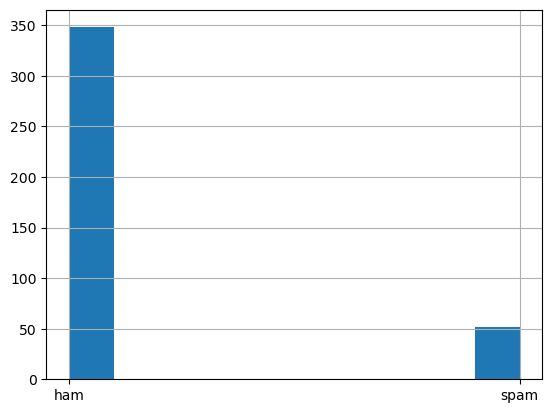

In [3]:
data['Category'].hist()

In [4]:
y = data['Category']
X = data['Message']


In [5]:
y = y.map({"ham":0,"spam":1})

In [6]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from tqdm import tqdm_notebook

tokens = [list(filter(str.isalpha, word_tokenize(text.lower()))) for text in tqdm_notebook(X)]

[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/var/folders/hq/_3wgnfwj0tsdsf9p56j3lccw0000gn/T/ipykernel_58822/3994999214.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tokens = [list(filter(str.isalpha, word_tokenize(text.lower()))) for text in tqdm_notebook(X)]


  0%|          | 0/400 [00:00<?, ?it/s]

In [7]:
import nltk
nltk.download("omw-1.4")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

X = [' '.join(lem.lemmatize(word) for word in array) for array in tqdm_notebook(tokens)]

[nltk_data] Downloading package omw-1.4 to /Users/alex/nltk_data...
[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
/var/folders/hq/_3wgnfwj0tsdsf9p56j3lccw0000gn/T/ipykernel_58822/3160997693.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  X = [' '.join(lem.lemmatize(word) for word in array) for array in tqdm_notebook(tokens)]


  0%|          | 0/400 [00:00<?, ?it/s]

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 10)



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
y_train = y_train.values
y_test = y_test.values
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
nb = MultinomialNB()

nb.fit(X_train_bow,y_train)
print(roc_auc_score(y_test,nb.predict(X_test_bow)))

0.9285714285714285


In [9]:
lr = LogisticRegression()
lr.fit(X_train_bow,y_train)
print(roc_auc_score(y_test,lr.predict(X_test_bow)))

0.9357142857142857


In [10]:
best_model = LogisticRegression()
best_model.fit(X_train_bow,y_train)

LogisticRegression()

In [11]:
data_scoring = pd.read_csv('data_scoring.csv')
data_scoring.head()

,Message
0,"Hurry up, I've been weed-deficient for like th..."
1,Sounds like a plan! Cardiff is still here and ...
2,Is it your yahoo boys that bring in the perf? ...
3,"K, I'll work something out"
4,Hi im having the most relaxing time ever! we h...


In [12]:
tokens = [list(filter(str.isalpha, word_tokenize(text.lower()))) for text in tqdm_notebook(data_scoring["Message"])]
data = [' '.join(lem.lemmatize(word) for word in array) for array in tqdm_notebook(tokens)]
data_bow = vectorizer.transform(data)

/var/folders/hq/_3wgnfwj0tsdsf9p56j3lccw0000gn/T/ipykernel_58822/1612244540.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tokens = [list(filter(str.isalpha, word_tokenize(text.lower()))) for text in tqdm_notebook(data_scoring["Message"])]


  0%|          | 0/5172 [00:00<?, ?it/s]

/var/folders/hq/_3wgnfwj0tsdsf9p56j3lccw0000gn/T/ipykernel_58822/1612244540.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  data = [' '.join(lem.lemmatize(word) for word in array) for array in tqdm_notebook(tokens)]


  0%|          | 0/5172 [00:00<?, ?it/s]

In [13]:
y_scoring = best_model.predict_proba(data_bow)[:,1]

In [14]:
pd.Series(y_scoring, name='score').to_csv('submission.csv', index=None)